# Student Performance Indicator

### Life cycle of Machine Learning Project

- Understanding The Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education , Lunch and Test Preparation course.

### 2) Import Data and Required Packages

### Import Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Import The Csv Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
df.shape

(1000, 8)

### Data Check to perform

- Check Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# There is no missing values

In [7]:
df.duplicated().sum()

0

In [8]:
#  There is no duplicates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe(include="int")

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;

- All standard deviations are also close-between 14.6 and 15.19;

- While there is a minimum score 0 for math, for writing minimum is much higer == 10 and for reading might higher = 17

## Exploring Data

In [12]:
print("Categories in 'gender' variable : " , end = " ")
print (df["gender"].unique())

print("Categories in 'race/ethnicity' variable : " , end = " ")
print (df["race_ethnicity"].unique())

print("Categories in 'parental level of education' variable : " , end = " ")
print (df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable : " , end = " ")
print (df["lunch"].unique())

print("Categories in 'test preparation course' variable : " , end = " ")
print (df["test_preparation_course"].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

print(numerical_features)
print(" ")
print(categorical_feature)

['math_score', 'reading_score', 'writing_score']
 
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [15]:
df["Total_score"] = df[["math_score","reading_score","writing_score"]].sum(axis=1)
df["Average_score"] = df["Total_score"]/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full= df[df["reading_score"] == 100]["Average_score"].count()
writing_full=df[df["writing_score"] == 100]["Average_score"].count()
math_full=df[df["math_score"] == 100]["Average_score"].count()

print("reading score = ", reading_full)
print("writing score = ", writing_full)
print("math score = ", math_full)

reading score =  17
writing score =  14
math score =  7


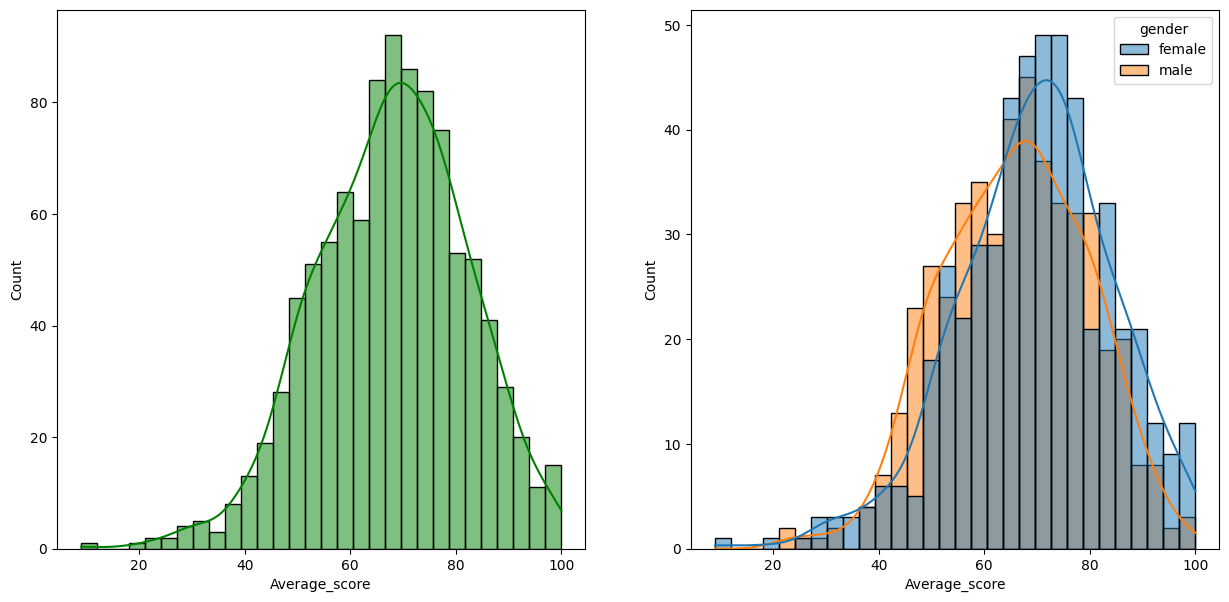

In [19]:
# Histogram & KDE

fig , ax  = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average_score",bins=30,kde =True,color="g")

plt.subplot(122)
sns.histplot(data=df,x="Average_score",bins=30,kde =True,hue="gender")
plt.show()

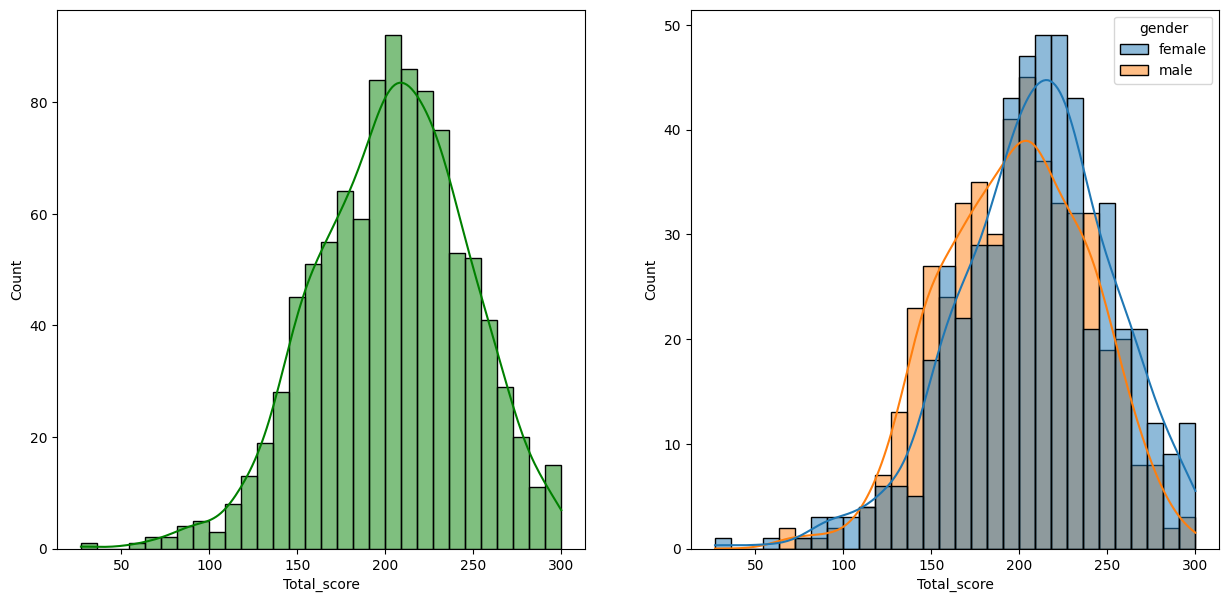

In [20]:

fig , ax  = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total_score",bins=30,kde =True,color="g")

plt.subplot(122)
sns.histplot(data=df,x="Total_score",bins=30,kde =True,hue="gender")
plt.show()

<Axes: xlabel='Average_score', ylabel='Count'>

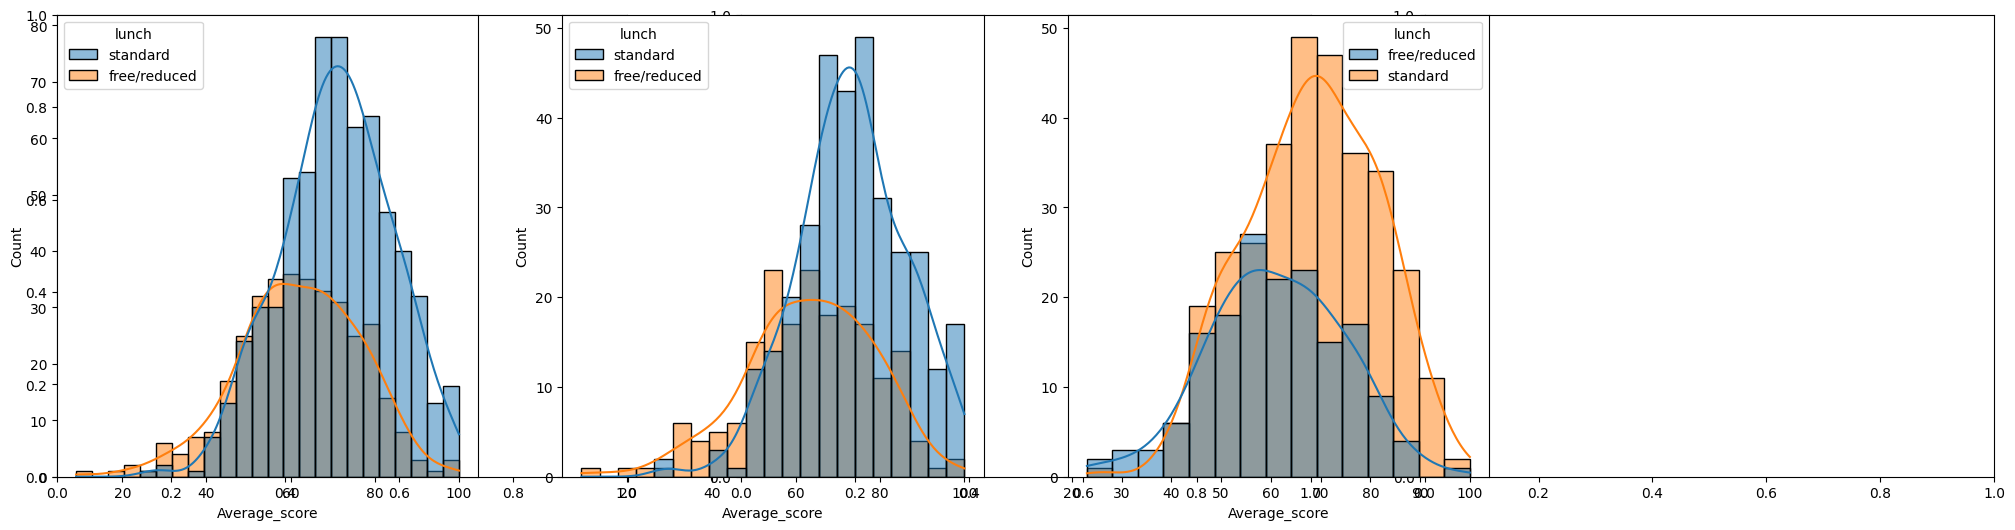

In [29]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141),
sns.histplot(data = df,x = "Average_score", kde = True, hue="lunch")

plt.subplot(142)
sns.histplot(data = df[df.gender == "female"],x = "Average_score", kde = True, hue="lunch")


plt.subplot(143)
sns.histplot(data = df[df.gender == "male"],x = "Average_score", kde = True, hue="lunch")


